In [74]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

data = load_iris()
X = data.data
y = data.target  
k = 3  
real_centroids = np.array([X[y == i].mean(axis=0) for i in range(k)])

num_iterations = 50
acc_scores = []

final_dataset = np.array([5] * len(y))
for _ in range(num_iterations):
    custom_labels, custom_centroids = k_means(X, k)
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    acc_score = accuracy_score(y, final_dataset)
    acc_scores.append(acc_score)

# Printing the accuracy scores for each run
for i, score in enumerate(acc_scores):
    print(f'Run {i + 1} - Acc Score: {score:.4f}')

# Printing the mean and standard deviation of accuracy scores
mean_acc_score = np.mean(acc_scores)
std_acc_score = np.std(acc_scores)
print(f'\nMean Acc Score: {mean_acc_score:.4f}')
print(f'Standard Deviation of Acc Scores: {std_acc_score:.4f}')


Run 1 - Acc Score: 0.8933
Run 2 - Acc Score: 0.8867
Run 3 - Acc Score: 0.8933
Run 4 - Acc Score: 0.8867
Run 5 - Acc Score: 0.6667
Run 6 - Acc Score: 0.8933
Run 7 - Acc Score: 0.6667
Run 8 - Acc Score: 0.8933
Run 9 - Acc Score: 0.8867
Run 10 - Acc Score: 0.8867
Run 11 - Acc Score: 0.8867
Run 12 - Acc Score: 0.6667
Run 13 - Acc Score: 0.8867
Run 14 - Acc Score: 0.8867
Run 15 - Acc Score: 0.6667
Run 16 - Acc Score: 0.8933
Run 17 - Acc Score: 0.8933
Run 18 - Acc Score: 0.8933
Run 19 - Acc Score: 0.6667
Run 20 - Acc Score: 0.8867
Run 21 - Acc Score: 0.8933
Run 22 - Acc Score: 0.6667
Run 23 - Acc Score: 0.8867
Run 24 - Acc Score: 0.8933
Run 25 - Acc Score: 0.8933
Run 26 - Acc Score: 0.8933
Run 27 - Acc Score: 0.6667
Run 28 - Acc Score: 0.8933
Run 29 - Acc Score: 0.8933
Run 30 - Acc Score: 0.8867
Run 31 - Acc Score: 0.8933
Run 32 - Acc Score: 0.8867
Run 33 - Acc Score: 0.8933
Run 34 - Acc Score: 0.8867
Run 35 - Acc Score: 0.8867
Run 36 - Acc Score: 0.8933
Run 37 - Acc Score: 0.8867
Run 38 - A

In [75]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y_true = data.target
n_clusters = 3

accuracy_scores = []

num_iterations = 50
for _ in range(num_iterations):
    final_dataset = np.empty(len(y_true), dtype=int)
    kmeans = KMeans(n_clusters=n_clusters, n_init=1).fit(X)
    
    # Finding the label mapping to the true labels
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y_true[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label
    
    # Mapping the cluster labels to the true labels
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y_true, final_dataset)
    accuracy_scores.append(accuracy)

for i, score in enumerate(accuracy_scores):
    print(f'Run {i + 1} - Acc Score: {score:.4f}')

# Printing the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f'\nMean Acc Score: {mean_accuracy:.4f}')
print(f'Standard Deviation of Acc Scores: {std_accuracy:.4f}')


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

Run 1 - Acc Score: 0.8867
Run 2 - Acc Score: 0.8933
Run 3 - Acc Score: 0.8933
Run 4 - Acc Score: 0.8867
Run 5 - Acc Score: 0.8933
Run 6 - Acc Score: 0.8933
Run 7 - Acc Score: 0.8867
Run 8 - Acc Score: 0.8867
Run 9 - Acc Score: 0.8933
Run 10 - Acc Score: 0.8933
Run 11 - Acc Score: 0.8867
Run 12 - Acc Score: 0.8933
Run 13 - Acc Score: 0.8867
Run 14 - Acc Score: 0.8933
Run 15 - Acc Score: 0.8867
Run 16 - Acc Score: 0.8867
Run 17 - Acc Score: 0.8867
Run 18 - Acc Score: 0.8867
Run 19 - Acc Score: 0.8933
Run 20 - Acc Score: 0.8933
Run 21 - Acc Score: 0.8933
Run 22 - Acc Score: 0.8867
Run 23 - Acc Score: 0.8933
Run 24 - Acc Score: 0.8867
Run 25 - Acc Score: 0.8933
Run 26 - Acc Score: 0.8867
Run 27 - Acc Score: 0.8933
Run 28 - Acc Score: 0.8933
Run 29 - Acc Score: 0.8933
Run 30 - Acc Score: 0.8867
Run 31 - Acc Score: 0.8933
Run 32 - Acc Score: 0.8867
Run 33 - Acc Score: 0.8867
Run 34 - Acc Score: 0.8867
Run 35 - Acc Score: 0.8867
Run 36 - Acc Score: 0.6667
Run 37 - Acc Score: 0.8867
Run 38 - A

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

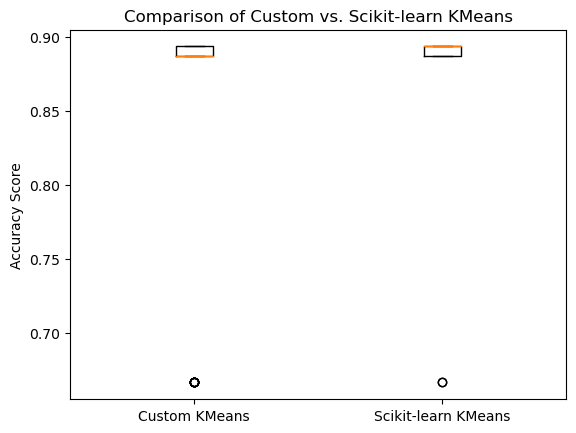

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# My Custom kmeans function
def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

data = load_iris()
X = data.data
y = data.target  
k = 3  
real_centroids = np.array([X[y == i].mean(axis=0) for i in range(k)])

# Storing accuracy scores for custom k-means
num_iterations = 50
acc_scores_custom = []

for _ in range(num_iterations):
    final_dataset = np.array([5] * len(y))
    custom_labels, custom_centroids = k_means(X, k)
    
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    
    acc_score = accuracy_score(y, final_dataset)
    acc_scores_custom.append(acc_score)

# Scikit-learn KMeans accuracy scores
accuracy_scores = []
num_iterations = 50

for _ in range(num_iterations):
    final_dataset = np.empty(len(y), dtype=int)
    kmeans = KMeans(n_clusters=k, n_init=1).fit(X)
    
    # Finding the label mapping to the true labels
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label
    
    # Mapping the cluster labels to the true labels
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y, final_dataset)
    accuracy_scores.append(accuracy)

plt.boxplot([acc_scores_custom, accuracy_scores], labels=['Custom KMeans', 'Scikit-learn KMeans'])
plt.ylabel('Accuracy Score')
plt.title('Comparison of Custom vs. Scikit-learn KMeans')
plt.show()


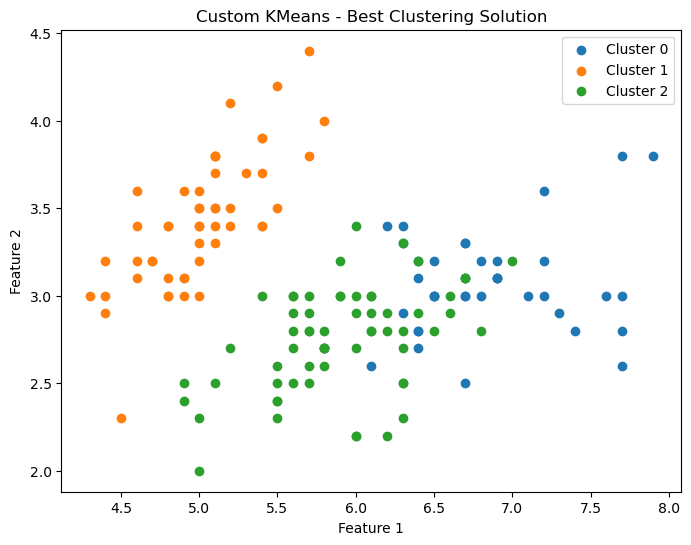

In [77]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

data = load_iris()
X = data.data
y = data.target
k = 3
real_centroids = np.array([X[y == i].mean(axis=0) for i in range(k)])

best_accuracy = 0
best_labels = None

num_iterations = 50
for _ in range(num_iterations):
    custom_labels, custom_centroids = k_means(X, k)
    final_dataset = np.array([5] * len(y))
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    acc_score = accuracy_score(y, final_dataset)
    if acc_score > best_accuracy:
        best_accuracy = acc_score
        best_labels = custom_labels

# Plotting the best clustering solution
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = X[best_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.legend()
plt.title('Custom KMeans - Best Clustering Solution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

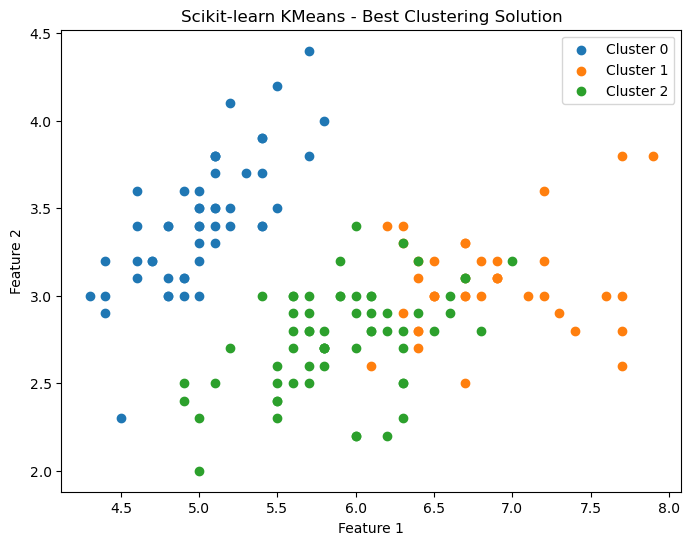

In [78]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y_true = data.target
n_clusters = 3

best_accuracy = 0
best_labels = None

num_iterations = 50
for _ in range(num_iterations):
    final_dataset = np.empty(len(y_true), dtype=int)
    kmeans = KMeans(n_clusters=n_clusters, n_init=1).fit(X)

    # Finding the label mapping to the true labels
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y_true[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label

    # Mapping the cluster labels to the true labels
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y_true, final_dataset)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_labels = kmeans.labels_

# Plotting the best clustering solution
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = X[best_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.legend()
plt.title('Scikit-learn KMeans - Best Clustering Solution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


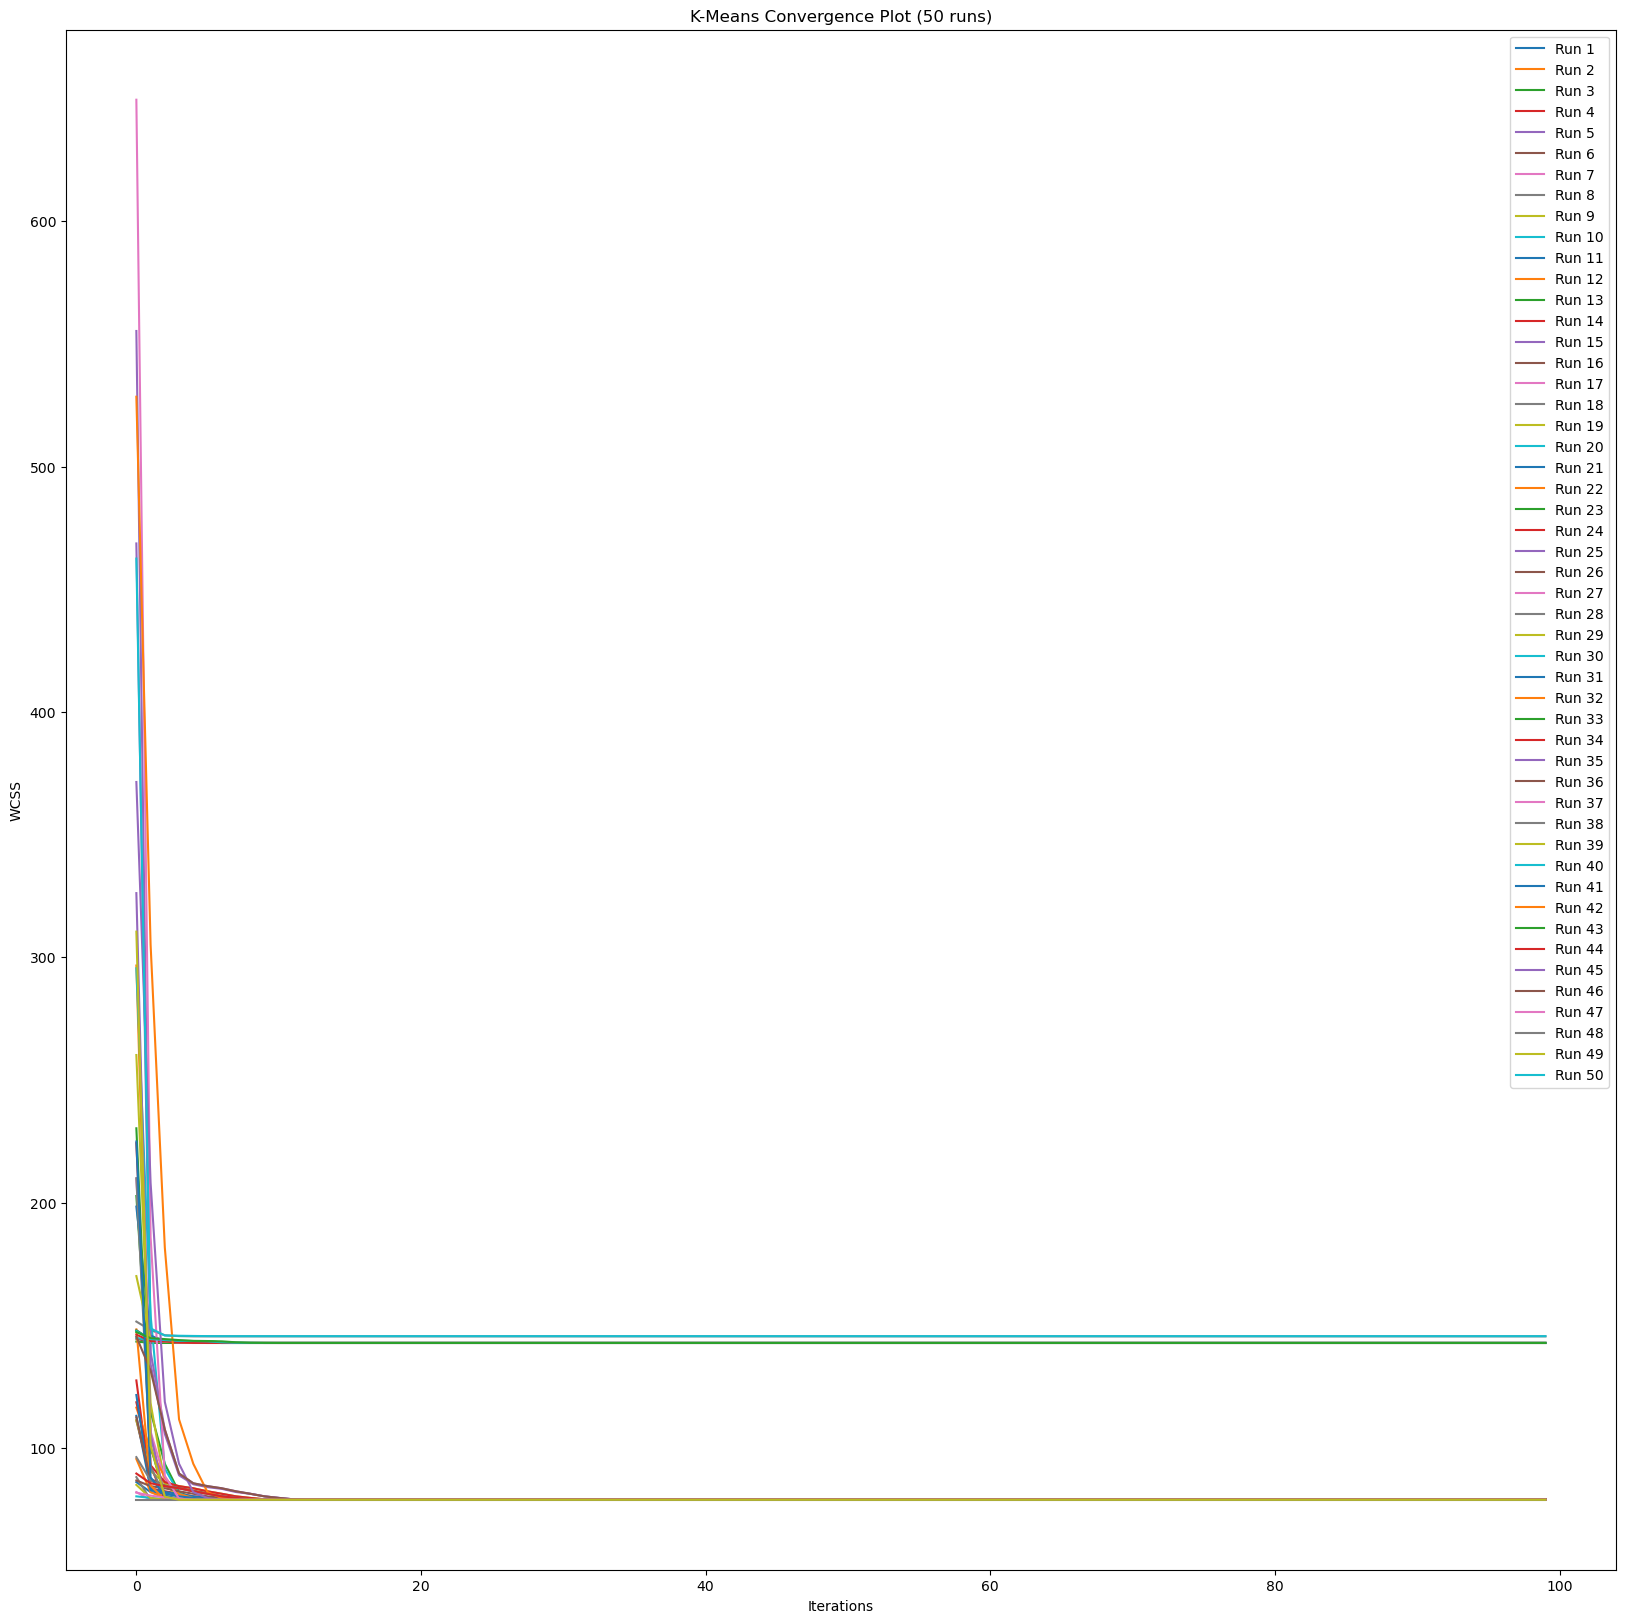

In [79]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    wcss_values = []
    
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        wcss = 0
        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                centroid = cluster_points.mean(axis=0)
                wcss += np.sum(np.linalg.norm(cluster_points - centroid, axis=1)**2)
        
        wcss_values.append(wcss)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            wcss_values.extend([wcss] * (max_iters - len(wcss_values)))
            break
        
        centroids = new_centroids
    
    return wcss_values

data = load_iris()
X = data.data
k = 3

num_iterations = 50
wcss_results = []

for _ in range(num_iterations):
    wcss = k_means(X, k)
    wcss_results.append(wcss)

# Plotting WCSS convergence for each run
plt.figure(figsize=(20, 20))
for i in range(num_iterations):
    plt.plot(range(len(wcss_results[i])), wcss_results[i], label=f'Run {i + 1}')

plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.title('K-Means Convergence Plot (50 runs)')
plt.legend()
plt.show()


In [80]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

data, labels = load_digits(return_X_y=True)
k = 10  # number of clusters for digits dataset
real_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

num_iterations = 50
acc_scores = []

final_dataset = np.array([5] * len(labels))
for _ in range(num_iterations):
    custom_labels, custom_centroids = k_means(data, k)
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    acc_score = accuracy_score(labels, final_dataset)
    acc_scores.append(acc_score)

# Printing the accuracy scores for each run
for i, score in enumerate(acc_scores):
    print(f'Run {i + 1} - Acc Score: {score:.4f}')

# Printing the mean and standard deviation of accuracy scores
mean_acc_score = np.mean(acc_scores)
std_acc_score = np.std(acc_scores)
print(f'\nMean Acc Score: {mean_acc_score:.4f}')
print(f'Standard Deviation of Acc Scores: {std_acc_score:.4f}')


Run 1 - Acc Score: 0.7935
Run 2 - Acc Score: 0.7935
Run 3 - Acc Score: 0.7206
Run 4 - Acc Score: 0.6978
Run 5 - Acc Score: 0.7218
Run 6 - Acc Score: 0.7268
Run 7 - Acc Score: 0.7201
Run 8 - Acc Score: 0.7752
Run 9 - Acc Score: 0.7129
Run 10 - Acc Score: 0.7206
Run 11 - Acc Score: 0.7156
Run 12 - Acc Score: 0.7435
Run 13 - Acc Score: 0.7446
Run 14 - Acc Score: 0.7268
Run 15 - Acc Score: 0.7168
Run 16 - Acc Score: 0.7874
Run 17 - Acc Score: 0.6299
Run 18 - Acc Score: 0.7446
Run 19 - Acc Score: 0.7880
Run 20 - Acc Score: 0.7396
Run 21 - Acc Score: 0.7880
Run 22 - Acc Score: 0.7919
Run 23 - Acc Score: 0.7190
Run 24 - Acc Score: 0.7902
Run 25 - Acc Score: 0.7935
Run 26 - Acc Score: 0.6995
Run 27 - Acc Score: 0.7190
Run 28 - Acc Score: 0.7273
Run 29 - Acc Score: 0.7863
Run 30 - Acc Score: 0.7908
Run 31 - Acc Score: 0.7902
Run 32 - Acc Score: 0.6856
Run 33 - Acc Score: 0.7262
Run 34 - Acc Score: 0.7229
Run 35 - Acc Score: 0.7401
Run 36 - Acc Score: 0.7034
Run 37 - Acc Score: 0.7279
Run 38 - A

In [81]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

data = load_digits()
X = data.data
y_true = data.target
n_clusters = 10

accuracy_scores = []

num_iterations = 50
for _ in range(num_iterations):
    final_dataset = np.empty(len(y_true), dtype=int)
    kmeans = KMeans(n_clusters=n_clusters, n_init=1).fit(X)
    
    # Finding the label mapping to the true labels
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y_true[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label
    
    # Mapping the cluster labels to the true labels
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y_true, final_dataset)
    accuracy_scores.append(accuracy)

for i, score in enumerate(accuracy_scores):
    print(f'Run {i + 1} - Acc Score: {score:.4f}')

# Printing the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f'\nMean Acc Score: {mean_accuracy:.4f}')
print(f'Standard Deviation of Acc Scores: {std_accuracy:.4f}')


Run 1 - Acc Score: 0.7385
Run 2 - Acc Score: 0.7858
Run 3 - Acc Score: 0.8625
Run 4 - Acc Score: 0.7262
Run 5 - Acc Score: 0.7446
Run 6 - Acc Score: 0.7268
Run 7 - Acc Score: 0.7902
Run 8 - Acc Score: 0.7919
Run 9 - Acc Score: 0.7457
Run 10 - Acc Score: 0.7941
Run 11 - Acc Score: 0.7908
Run 12 - Acc Score: 0.7284
Run 13 - Acc Score: 0.8102
Run 14 - Acc Score: 0.7435
Run 15 - Acc Score: 0.7379
Run 16 - Acc Score: 0.7935
Run 17 - Acc Score: 0.8125
Run 18 - Acc Score: 0.7257
Run 19 - Acc Score: 0.7913
Run 20 - Acc Score: 0.8164
Run 21 - Acc Score: 0.7240
Run 22 - Acc Score: 0.7218
Run 23 - Acc Score: 0.7129
Run 24 - Acc Score: 0.7935
Run 25 - Acc Score: 0.7218
Run 26 - Acc Score: 0.7924
Run 27 - Acc Score: 0.7446
Run 28 - Acc Score: 0.7874
Run 29 - Acc Score: 0.7279
Run 30 - Acc Score: 0.7290
Run 31 - Acc Score: 0.7913
Run 32 - Acc Score: 0.8575
Run 33 - Acc Score: 0.7935
Run 34 - Acc Score: 0.7930
Run 35 - Acc Score: 0.7947
Run 36 - Acc Score: 0.7908
Run 37 - Acc Score: 0.7295
Run 38 - A

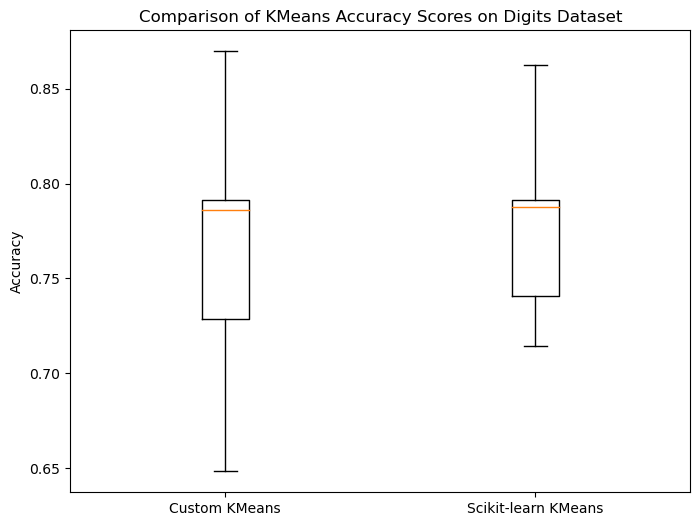

In [82]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# Custom KMeans
data, labels = load_digits(return_X_y=True)
k = 10
real_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

num_iterations = 50
acc_scores_custom = []

final_dataset = np.array([5] * len(labels))
for _ in range(num_iterations):
    custom_labels, custom_centroids = k_means(data, k)
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    acc_score = accuracy_score(labels, final_dataset)
    acc_scores_custom.append(acc_score)

# Scikit-learn KMeans
data = load_digits()
X = data.data
y_true = data.target
n_clusters = 10

accuracy_scores_sklearn = []

num_iterations = 50
for _ in range(num_iterations):
    final_dataset = np.empty(len(y_true), dtype=int)
    kmeans = KMeans(n_clusters=n_clusters, n_init=1).fit(X)
    
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y_true[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label
    
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y_true, final_dataset)
    accuracy_scores_sklearn.append(accuracy)

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([acc_scores_custom, accuracy_scores_sklearn], labels=['Custom KMeans', 'Scikit-learn KMeans'])
plt.title('Comparison of KMeans Accuracy Scores on Digits Dataset')
plt.ylabel('Accuracy')
plt.show()


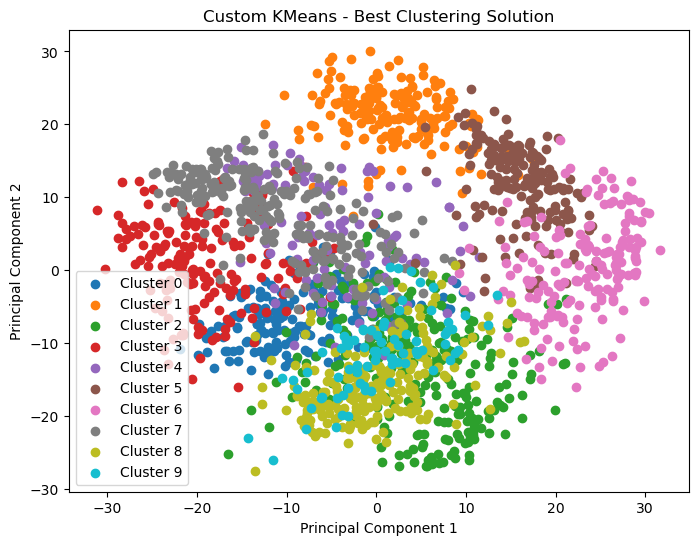


Mean Acc Score: 0.7493
Standard Deviation of Acc Scores: 0.0387


In [84]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

data, labels = load_digits(return_X_y=True)
k = 10
real_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

num_iterations = 50
acc_scores = []

final_dataset = np.array([5] * len(labels))
best_accuracy = 0
best_labels = None

for _ in range(num_iterations):
    custom_labels, custom_centroids = k_means(data, k)
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    acc_score = accuracy_score(labels, final_dataset)
    acc_scores.append(acc_score)
    
    if acc_score > best_accuracy:
        best_accuracy = acc_score
        best_labels = custom_labels

# Using PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plotting the best clustering solution from custom KMeans
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = data_pca[best_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.legend()
plt.title('Custom KMeans - Best Clustering Solution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

mean_acc_score = np.mean(acc_scores)
std_acc_score = np.std(acc_scores)
print(f'\nMean Acc Score: {mean_acc_score:.4f}')
print(f'Standard Deviation of Acc Scores: {std_acc_score:.4f}')


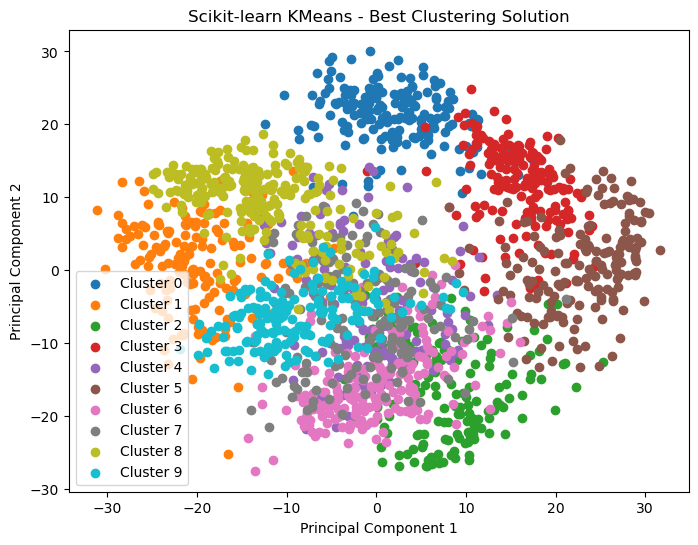


Mean Acc Score: 0.7719
Standard Deviation of Acc Scores: 0.0391


In [85]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = load_digits()
X = data.data
y_true = data.target
n_clusters = 10

accuracy_scores = []

num_iterations = 50
best_accuracy = 0
best_labels = None

for _ in range(num_iterations):
    final_dataset = np.empty(len(y_true), dtype=int)
    kmeans = KMeans(n_clusters=n_clusters, n_init=1).fit(X)
    
    # Finding the label mapping to the true labels
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y_true[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label
    
    # Mapping the cluster labels to the true labels
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y_true, final_dataset)
    accuracy_scores.append(accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_labels = kmeans.labels_

# Using PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the best clustering solution from scikit-learn KMeans
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = X_pca[best_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.legend()
plt.title('Scikit-learn KMeans - Best Clustering Solution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f'\nMean Acc Score: {mean_accuracy:.4f}')
print(f'Standard Deviation of Acc Scores: {std_accuracy:.4f}')


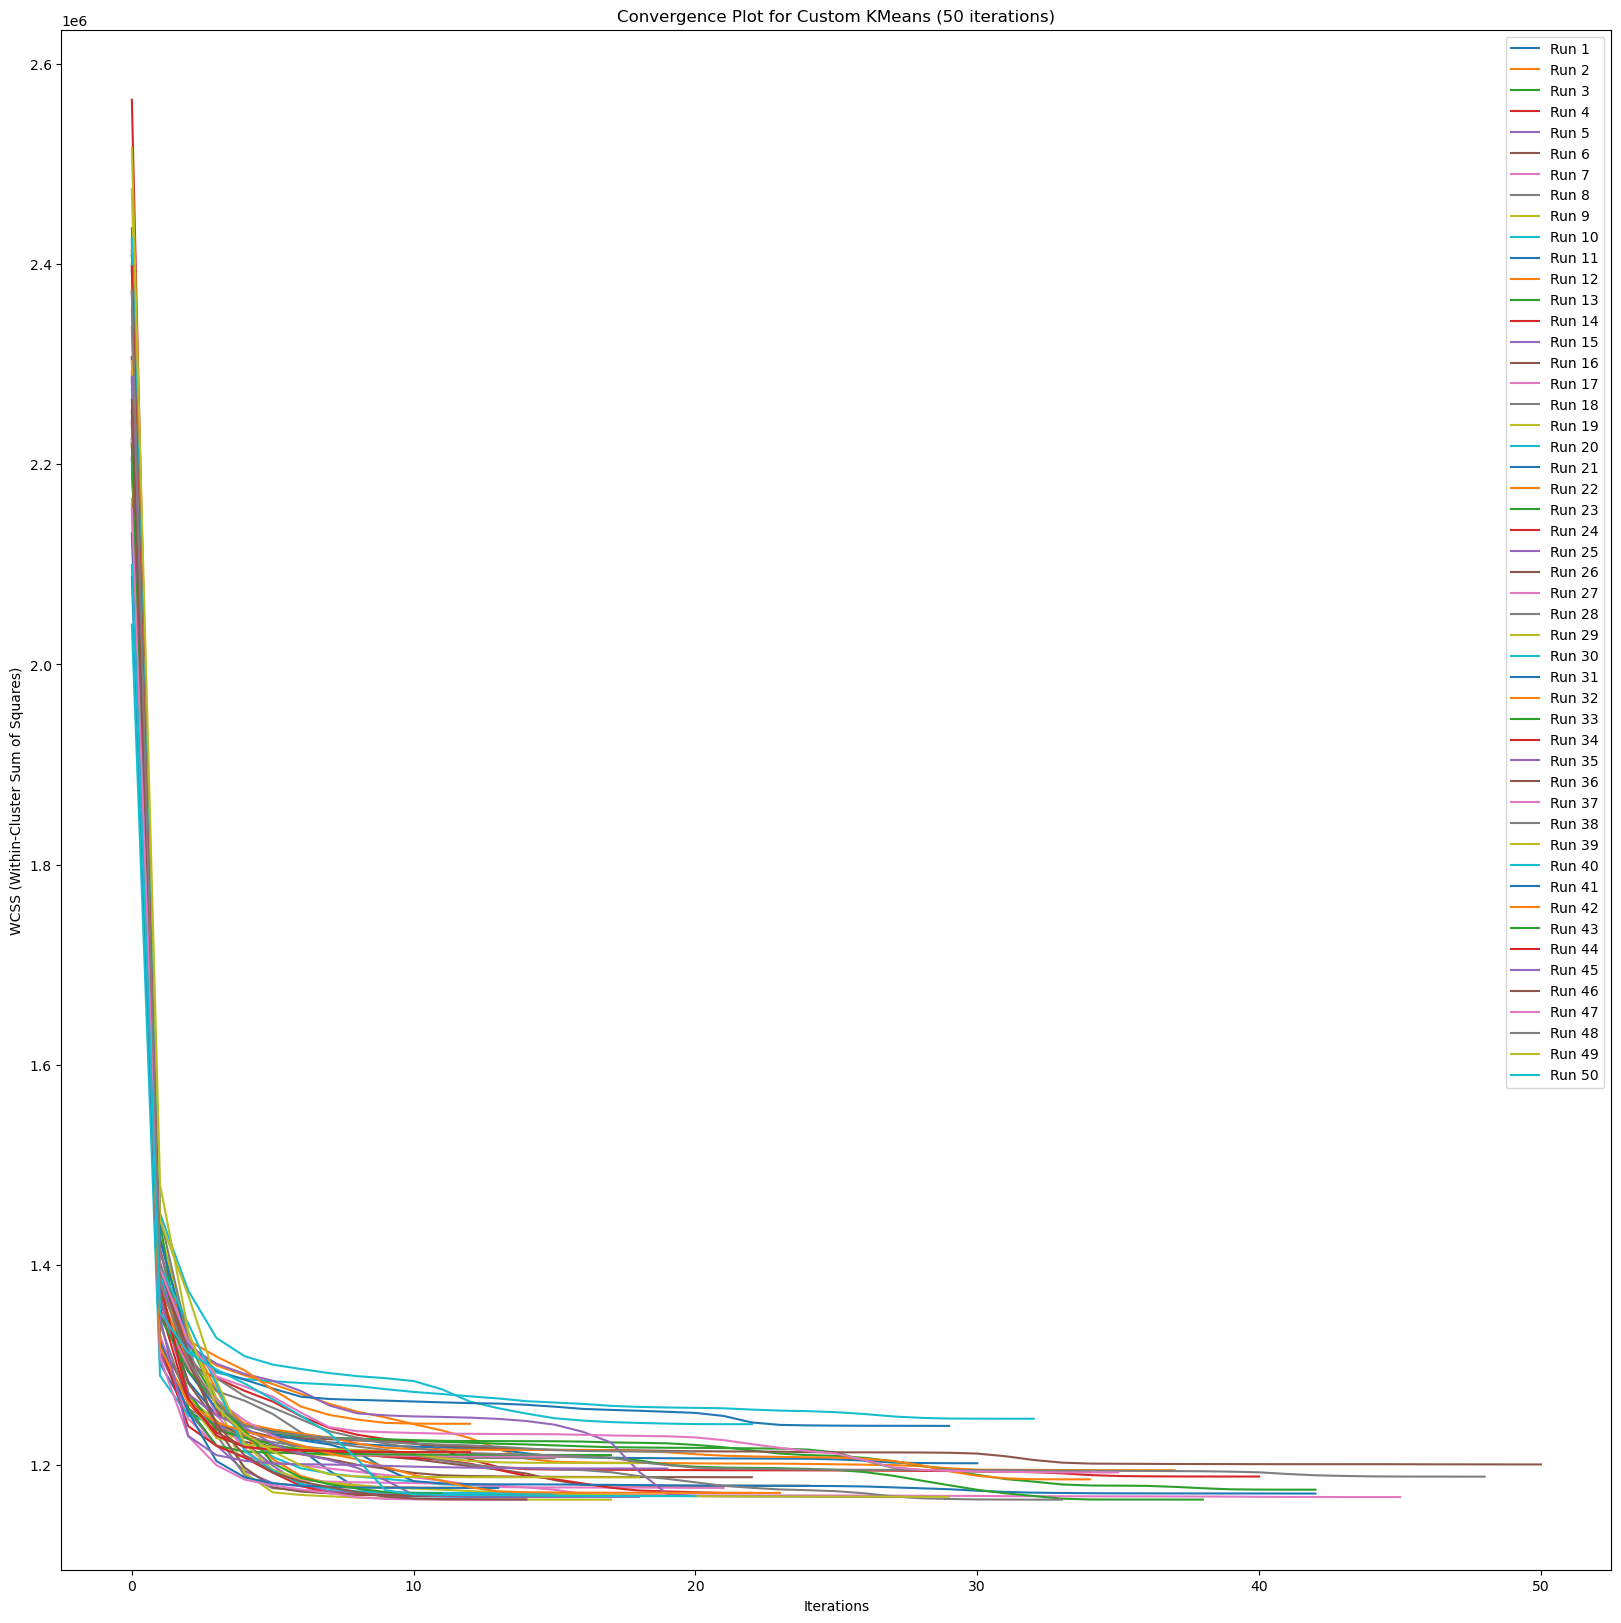

In [86]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    wcss_values = []
    
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        wcss = 0
        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                wcss += np.sum((cluster_points - centroids[i])**2)
        
        wcss_values.append(wcss)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return wcss_values

data, _ = load_digits(return_X_y=True)
k = 10 

num_iterations = 50
convergence_lines = []

for _ in range(num_iterations):
    wcss = k_means(data, k)
    convergence_lines.append(wcss)

plt.figure(figsize=(20,20))
for i in range(num_iterations):
    plt.plot(range(len(convergence_lines[i])), convergence_lines[i], label=f'Run {i + 1}')

plt.xlabel('Iterations')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Convergence Plot for Custom KMeans (50 iterations)')
plt.legend()
plt.show()
